# Øving 1

## Oppgave 2

### a)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc

In [65]:
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
ys = [0.0, 16.5, 32.0, 44.0, 51.5, 55.5, 58.0]

In [66]:
def plot_characteristic():
    plt.plot(xs, ys, "-o", label="Karakteristikk")
    plt.xlabel('Målevariabel (cm)')
    plt.ylabel('Målesignal (mV)')

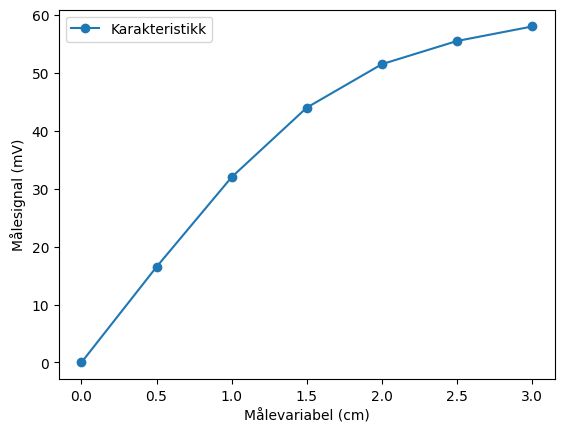

In [67]:
plot_characteristic()
plt.legend()
plt.show()

### b)

In [68]:
min_x = xs[0]
max_x = xs[-1]

min_y = ys[0]
max_y = ys[-1]

def f_endpoint(x):
    a = (max_y - min_y) / (max_x - min_x)
    b = min_y - a * min_x
    return a * x + b

def plot_endpoints():
    xs = np.linspace(min_x, max_x, 10)
    ys = f_endpoint(xs)
    plt.plot(xs, ys, label="Endepunkt")

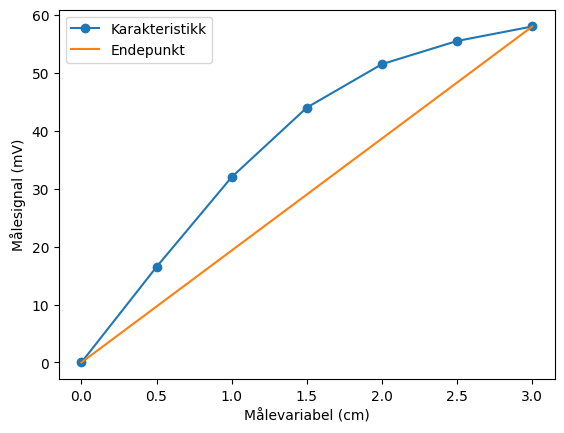

In [69]:
plot_characteristic()
plot_endpoints()
plt.legend()
plt.show()

In [70]:
print("a = ", (max_y - min_y) / (max_x - min_x))

a =  19.333333333333332


### c)

In [71]:
error_xs = xs
error_ys = [y - f_endpoint(x) for x, y in zip(xs, ys)]

def plot_error():
    # TODO: Should this curve be in %?
    plt.plot(error_xs, error_ys, "-o", label="Avvik")

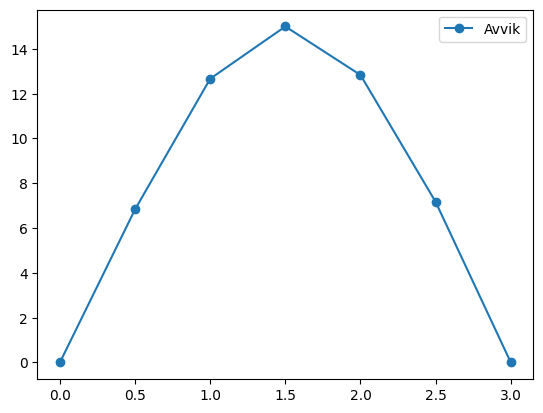

In [72]:
plot_error()
plt.legend()
plt.show()

In [73]:
max_error = max(zip(error_xs, error_ys), key=lambda item: item[1])
max_error_y = max_error[1]
max_endpoint_based_nonlinearity = max_error_y / (max_y - min_y) * 100

In [74]:
print(f"Maksimalt endepunktbasert ulinearitet i prosent av måleomfanget:\n{max_error_y}%")

Maksimalt endepunktbasert ulinearitet i prosent av måleomfanget:
15.0%


## Oppgave 3

### a)

#### Plotte datasettet

In [75]:
xs = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0]

series_1_ys = [4.00, 7.20, 10.4, 13.6, 16.8, 20.0]
series_2_ys = [4.00, 8.40, 12.8, 17.2, 21.6, 26.0]
series_3_ys = [6.00, 9.20, 12.4, 15.6, 18.8, 22.0]

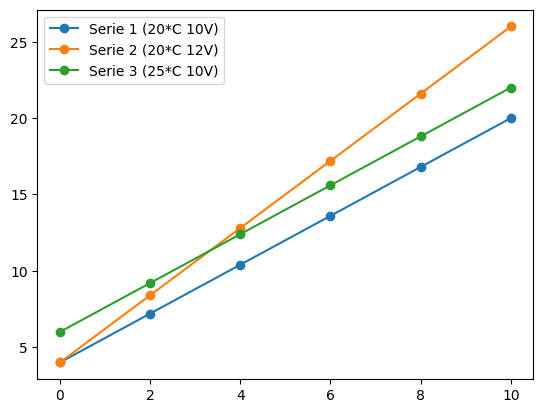

In [76]:
plt.plot(xs, series_1_ys, "-o", label="Serie 1 (20*C 10V)")
plt.plot(xs, series_2_ys, "-o", label="Serie 2 (20*C 12V)")
plt.plot(xs, series_3_ys, "-o", label="Serie 3 (25*C 10V)")
plt.legend()
plt.show()

#### Bestemme parametrene

Leser av grafen og ser at temperaturen forsterker signalet hele vegen mens spenningen kun øker signalet med en konstant verdi.
- I<sub>M</sub>: Spenning
- I<sub>I</sub>: Temperatur

$K = \frac{O_{maks} - O_{min}}{I_{maks} - I_{min}}$

In [77]:
omax = series_1_ys[-1]
omin = series_1_ys[0]

imax = xs[-1]
imin = xs[0]

k = (omax - omin) / (imax - imin)

$a = O(I_{min})$

In [78]:
a = omin

$K_I = \frac{\Delta O(I_{min})}{\Delta I_I}$

In [79]:
ki = (series_3_ys[0] - series_1_ys[0]) / (25 - 20)

$I_{50\%} = \frac{I_{maks} + I_{min}}{2}$

In [80]:
# Siden vi har en lineær funksjon, så kan imax brukes i stede
# i_center = ((imin + imax) / 2)
i_center = imax

$K_M = \frac{1}{I_{50\%}} * (\frac{\Delta O(I_{50\%})}{\Delta I_M})$

In [81]:

# Siden vi har en lineær funksjon, så kan omax brukes i stede
# lower_mid_index = len(series_2_ys) // 2
# series_1_o_center = (series_1_ys[lower_mid_index] + series_1_ys[lower_mid_index + 1]) / 2
# series_2_o_center = (series_2_ys[lower_mid_index] + series_2_ys[lower_mid_index + 1]) / 2
# delta_o_center = series_2_o_center - series_1_o_center

delta_o_center = series_2_ys[-1] - series_1_ys[-1]

km = (1/i_center) * ((delta_o_center / (12 - 10)))

#### Svar

In [82]:
print(f"K: {k}")
print(f"Km: {km}")
print(f"Ki: {ki}")
print(f"a: {a}")

K: 1.6
Km: 0.30000000000000004
Ki: 0.4
a: 4.0


### b)

In [83]:
def signal(i, ii, im):
    return (k + km * im) * i + (ki * ii) + a

In [84]:
o = signal(5.0, 5.0, 2.0)

In [85]:

print(f"Signal: {o:.2f} mA")

Signal: 17.00 mA


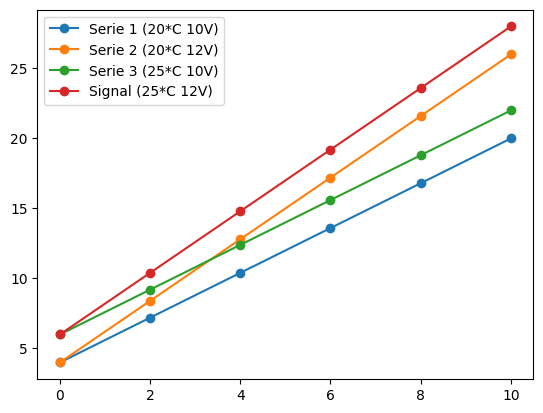

In [86]:
plt.plot(xs, series_1_ys, "-o", label="Serie 1 (20*C 10V)")
plt.plot(xs, series_2_ys, "-o", label="Serie 2 (20*C 12V)")
plt.plot(xs, series_3_ys, "-o", label="Serie 3 (25*C 10V)")
plt.plot(xs, [signal(x, 5.0, 2.0) for x in xs], "-o", label="Signal (25*C 12V)")
plt.legend()
plt.show()

## Oppgave 4

### a)

#### Plotte datasettet

In [87]:
xs = [0.0, 2.0, 4.0, 6.0, 8.0]
series_1_ys = [4.00, 8.00, 12.0, 16.0, 20.0]
series_2_ys = [6.00, 11.6, 17.2, 22.8, 28.4]

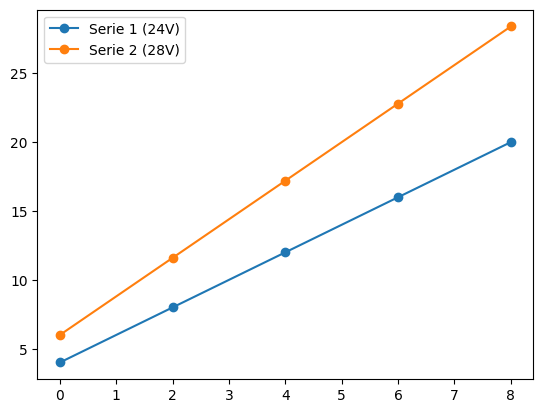

In [88]:
plt.plot(xs, series_1_ys, "-o", label="Serie 1 (24V)")
plt.plot(xs, series_2_ys, "-o", label="Serie 2 (28V)")
plt.legend()
plt.show()

#### Bestemme parametrene

Ser på grafen at spenningen bidrar både i form av konstantledd og forsterkning av signalet.
- I<sub>M</sub>: Spenning
- I<sub>I</sub>: Spenning

$K = \frac{O_{maks} - O_{min}}{I_{maks} - I_{min}}$

In [89]:
omax = series_1_ys[-1]
omin = series_1_ys[0]

imax = xs[-1]
imin = xs[0]

k = (omax - omin) / (imax - imin)

$a = O(I_{min})$

In [90]:
a = omin

$K_I = \frac{\Delta O(I_{min})}{\Delta I_I}$

In [91]:
ki = (series_2_ys[0] - series_1_ys[0]) / (28 - 24)

$I_{50\%} = \frac{I_{maks} + I_{min}}{2}$

In [92]:
# Siden vi har en lineær funksjon, så kan imax brukes i stede
# i_center = ((imin + imax) / 2)
i_center = imax

Siden spenningen påvirker både konstantledd og forsterkningen må vi ta hensyn til det ved å trekke fra $K_I$.

$K_M = \frac{1}{I_{50\%}} * (\frac{\Delta O(I_{50\%})}{\Delta I_M} - K_I)$

In [93]:

# Siden vi har en lineær funksjon, så kan omax brukes i stede
# lower_mid_index = len(series_2_ys) // 2
# series_1_o_center = (series_1_ys[lower_mid_index] + series_1_ys[lower_mid_index + 1]) / 2
# series_2_o_center = (series_2_ys[lower_mid_index] + series_2_ys[lower_mid_index + 1]) / 2
# delta_o_center = series_2_o_center - series_1_o_center

delta_o_center = series_2_ys[-1] - series_1_ys[-1]

km = (1/i_center) * ((delta_o_center / (28 - 24)) - ki)

#### Svar

In [94]:
print(f"K: {k}")
print(f"Km: {km}")
print(f"Ki: {ki}")
print(f"a: {a}")

K: 2.0
Km: 0.19999999999999996
Ki: 0.5
a: 4.0


### b)

In [95]:
def signal(i, ii, im):
    return (k + km * im) * i + (ki * ii) + a

In [96]:
o = signal(5.0, 2.0, 2.0)

In [97]:

print(f"Signal: {o:.2f} mA")

Signal: 17.00 mA


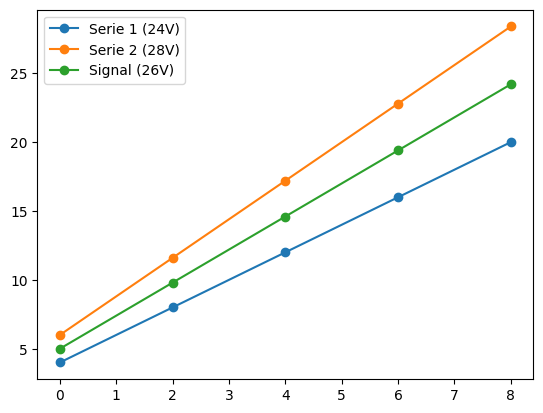

In [98]:
plt.plot(xs, series_1_ys, "-o", label="Serie 1 (24V)")
plt.plot(xs, series_2_ys, "-o", label="Serie 2 (28V)")
plt.plot(xs, [signal(x, 2.0, 2.0) for x in xs], "-o", label="Signal (26V)")
plt.legend()
plt.show()

## Oppgave 5

### a)

Tilbakekoblingen under slipper kun gjennom signaler hvis viseren ikke er i riktig posisjon. Hvis viseren ble flyttet manuellt og inngangssignalet forblir likt vil tilbakekoblingen motarbeide den eksterne kraften påtrykt viseren.

```mermaid
flowchart LR

    
    A[I]
    B((+))
    C[Kv]
    D[Ks]
    E[O]
    F[K]

    A -->|+| B --> C --> D --> E
    D --> F -->|-| B
```

$\frac{O}{I} = \frac{Kv*Ks}{1 + Kv*Ks*K}$

$\frac{O}{I} = \frac{0.2*0.05}{1 + 0.2*0.05*1000}$

$\frac{O}{I} = \frac{0.01}{1 + 0.01*1000}$

$\frac{O}{I} = \frac{0.01}{1 + 10}$

$\frac{O}{I} = \frac{1}{1100}$

### b)

In [99]:
0.1*(1/1100)

9.090909090909092e-05

## Oppgave 6

In [100]:
values = [
    *[208.6, 208.3, 208.7, 208.5, 208.8, 207.6, 208.9, 209.1, 208.2, 208.4],
    *[208.1, 209.2, 209.6, 208.6, 208.5, 207.4, 210.2, 209.2, 208.7, 208.4],
    *[207.7, 208.9, 208.7, 208.0, 209.0, 208.1, 209.3, 208.2, 208.6, 209.4],
    *[207.6, 208.1, 208.8, 209.2, 209.7],
]

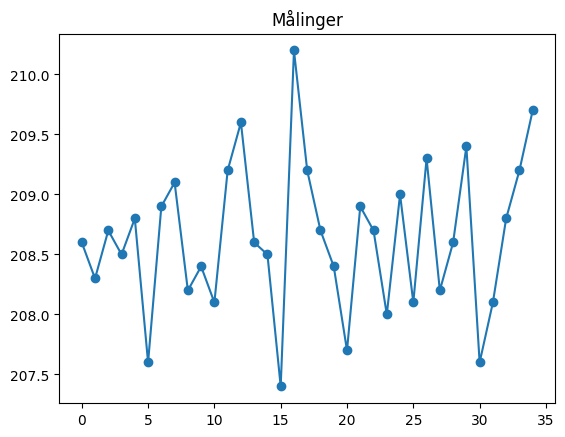

In [101]:
plt.plot(values, "-o")
plt.title("Målinger")
plt.show()

In [102]:
midvalue = sum(values)/len(values)

In [103]:
S = np.sqrt((1/(len(values) - 1))*sum([(x-midvalue)**2 for x in values]))

In [104]:
print(f"Estimat: {unc.ufloat(midvalue, S):.1f}")

Estimat: 208.6+/-0.6


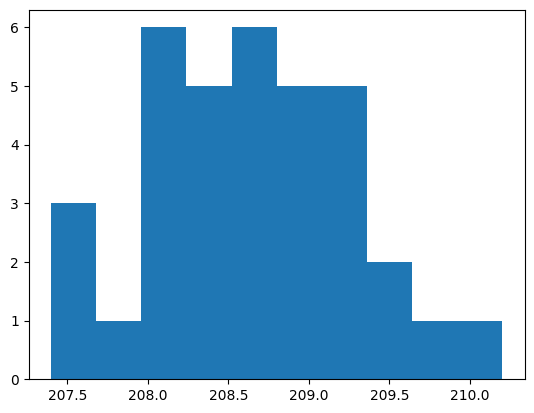

In [105]:
plt.hist(values)
plt.show()